In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import cross_validation
from sklearn import linear_model,neighbors
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df=pd.read_csv('insurance.csv')
df.head(5)
df.loc[:5,"charges"]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [4]:
from sklearn.preprocessing import LabelEncoder
sex=LabelEncoder()
df['sex']=sex.fit_transform(df['sex'].astype(str))

region=LabelEncoder()
df['region']=region.fit_transform(df['region'].astype(str))

smoker=LabelEncoder()
df['smoker']=smoker.fit_transform(df['smoker'].astype(str))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


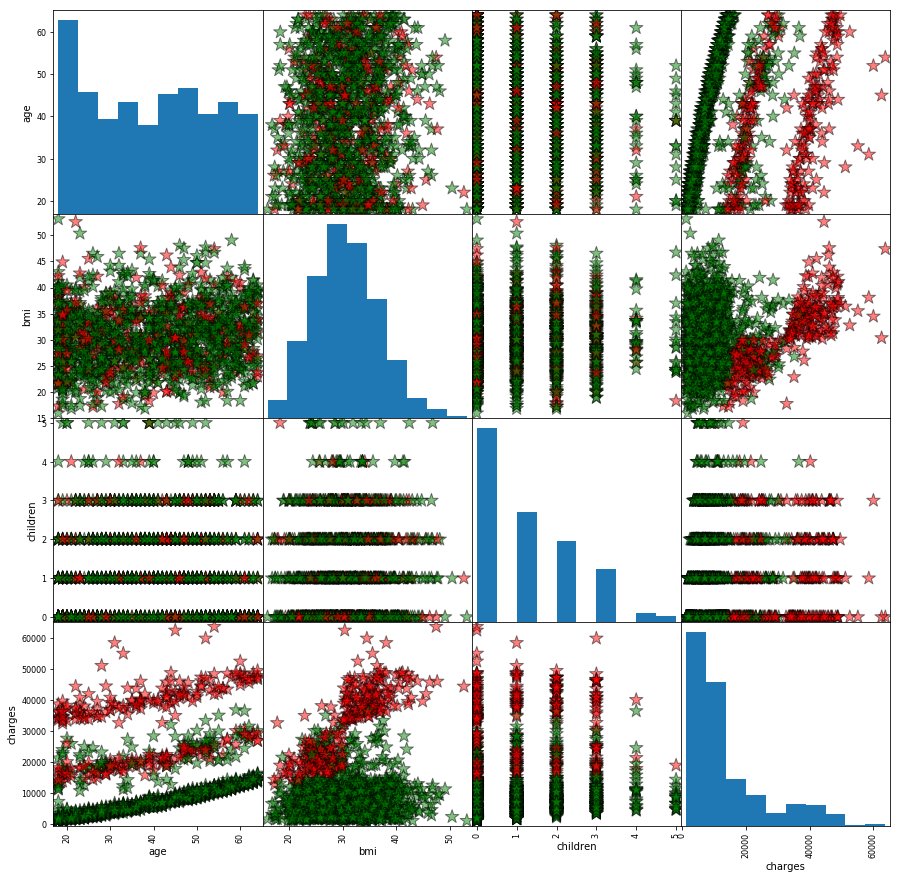

In [18]:
color_list = ['red' if i=='yes' else 'green' for i in data.loc[:,'smoker']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'smoker'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

In [8]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [ ]:
color_list = ['red' if i=='yes' else 'green' for i in data.loc[:,'smoker']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'smoker'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

In [10]:
XC = np.array(df.drop(['charges'],1))
yC = np.array(df['charges'])
X_trainC , X_testC,y_trainC , y_testC = cross_validation.train_test_split(XC,yC,test_size=0.2)



In [12]:
charges_clf=linear_model.LinearRegression()
charges_clf.fit(X_trainC,y_trainC)
predicted_charges=charges_clf.predict(X_testC)
print(predicted_charges)
charges_accuracy=charges_clf.score(X_testC,y_testC)
print('charges accuracy score using Linear regression: ',charges_accuracy*100)

[ 6.86957065e+03  4.75645396e+03  6.82058714e+03  9.76812364e+03
  5.61678683e+03  2.30525159e+03  4.04009243e+04  3.89310212e+03
  3.05053429e+04  1.35317851e+04  2.47015293e+04  3.88636053e+04
  3.73339527e+03  3.85376209e+03  6.04292390e+03  5.63003694e+03
  1.86057132e+04  2.82504160e+04  2.94778490e+04  3.01487065e+04
  3.01946450e+03  2.86754405e+04  6.57572714e+03  1.21294963e+04
  1.47893668e+02  3.66108097e+04  1.20141467e+04  2.96523752e+04
  1.07094279e+04  4.75185161e+03  3.35888967e+04  8.84710531e+03
  6.58988423e+03  1.18322197e+03  2.85349296e+04  1.16214753e+04
  1.76304581e+04  1.45028818e+04  1.01240075e+04  3.30921468e+04
  3.41884585e+04  3.35116331e+04  4.27674567e+03  4.75667110e+03
  4.17478433e+03  5.69065055e+03  1.06414823e+04  3.99702997e+03
  1.34070617e+04  2.93940447e+04  1.00521038e+04  1.70395600e+03
  1.38502106e+04 -3.16074875e+02  1.17957901e+04  3.01101446e+03
  4.71530500e+03  8.02367210e+03  3.80979009e+04  1.02504158e+04
  3.51275282e+04  3.83269

In [13]:
clf_tree = tree.DecisionTreeRegressor()
clf_tree.fit(X_trainC,y_trainC)
charges_accuracy_tree=clf_tree.score(X_testC,y_testC)
print(clf_tree.predict(X_testC))

print('charges accuracy score using Tree regression: ',charges_accuracy_tree*100)


[ 2534.39375 18955.22017  2404.7338   7348.142    4243.59005  2201.0971
 46255.1125   3206.49135 58571.07448  6435.6237  16232.847   46130.5265
 24059.68019  3556.9223   4462.7218   4883.866   15230.32405 18259.216
 34303.1672  36950.2567   1972.95    35595.5898   5969.723    8835.26495
  2201.0971  44260.7499   9715.841   20773.62775  7152.6714   1631.8212
 39556.4945   8932.084    4889.0368   2709.1119  19444.2658   8310.83915
 15170.069   13844.7972   9866.30485 62592.87309 23568.272   21978.6769
  1631.8212   4504.6624   3761.292    3172.018   23563.01618  4529.477
 20781.48892 21082.16     9447.25035  1632.56445 11945.1327   1628.4709
 11253.421    2523.1695   1631.8212   4673.3922  44202.6536   3847.674
 42969.8527   3484.331   14901.5167   4266.1658  12815.44495  9880.068
  5989.52365 38126.2465  35069.37452  8520.026    9048.0273   5974.3847
 34779.615   18648.4217   1826.843    1725.5523   2689.4954  14901.5167
  9880.068    6393.60345  1842.519   22218.1149   7151.092    2480